In [38]:
import numpy as np
import pandas as pd 
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

%matplotlib inline


In [3]:
cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [11]:
features = pd.DataFrame(cancer.data, columns = cancer.feature_names )
target = pd.DataFrame(cancer.target, columns = ['Target'])
data = pd.concat([features, target], axis =1)

In [17]:
a = data.corr('pearson')
a

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [15]:
abs(a.loc['Target']).sort_values(ascending = False)

Target                     1.000000
worst concave points       0.793566
worst perimeter            0.782914
mean concave points        0.776614
worst radius               0.776454
mean perimeter             0.742636
worst area                 0.733825
mean radius                0.730029
mean area                  0.708984
mean concavity             0.696360
worst concavity            0.659610
mean compactness           0.596534
worst compactness          0.590998
radius error               0.567134
perimeter error            0.556141
area error                 0.548236
worst texture              0.456903
worst smoothness           0.421465
worst symmetry             0.416294
mean texture               0.415185
concave points error       0.408042
mean smoothness            0.358560
mean symmetry              0.330499
worst fractal dimension    0.323872
compactness error          0.292999
concavity error            0.253730
fractal dimension error    0.077972
smoothness error           0

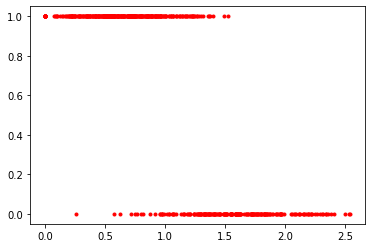

In [39]:
x = np.array(data['worst concave points'])
y = np.array(data['Target'])

x = x/x.mean()
plt.plot(x,y,'r.')

In [22]:
n = int(0.8 * len(x))

x_train = x[:n]
y_train = y[:n]

x_test = x[n:]
y_test = y[n:]

In [24]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [44]:
def error(a,b,x,y):
  error = 0
  m= len(x)
  for i in range(m):
    z = a*x[i] + b
    error+= y[i]*np.log(sigmoid(z)) + (1-y[i])*np.log(1-sigmoid(z))
    return (-1/m) * error

In [30]:
def step_gradient(a,b,x,y,learning_rate):
  grad_a = 0
  grad_b = 0
  m = len(x)
  for i in range(m):
    z = a*x[i] + b 
    grad_a += 1/m * (sigmoid(z)-y[i])*x[i]
    grad_b += 1/m * (sigmoid(z)-y[i])
    a = a-(grad_a * learning_rate)
    b = b-(grad_b * learning_rate)
    return a,b

In [31]:
def descend(initial_a, initial_b, x,y,learning_rate,iterations):
  a = initial_a
  b = initial_b
  for i in range(iterations):
    e = error(a,b,x,y)
    if i % 1000 == 0:
      print(f'Error: {e}')
      a,b = step_gradient(a,b,x,y,learning_rate)
      return a,b

In [41]:
def accuracy(theta, a,b,x,y):
  count = 0
  for j in range(len(x)):
    test = sigmoid(theta)

    if test[j] >0.9:
      z=1
    else:
        z = 0
        if y[j] ==z:
          count +=1
          acc = count/len(y)
          print(f"Error is {100-(acc*100)}")

In [56]:
a = 1
b = 1
learning_rate = 0.01
iterations = 10000
final_a, final_b = descend(a,b,x_train, y_train, learning_rate, iterations)

Error: 0.00736575521780438


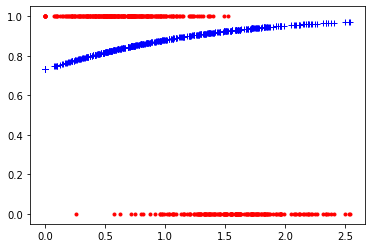

In [57]:
f = final_a* x_train + final_b
plt.plot(x_train, y_train, 'r.', x_train, sigmoid(f),'b+')

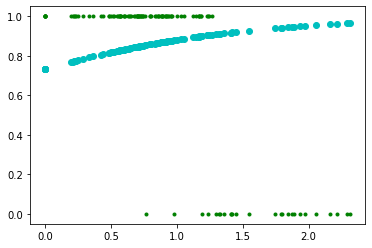

In [58]:
g = final_a*x_test + final_b
plt.plot(x_test, y_test, 'g.', x_test, sigmoid(g), 'co')